In [1]:
print("Mario Cahyadi - 0706022210020")
print("Pima Indians Diabetes Database")

Mario Cahyadi - 0706022210020
Pima Indians Diabetes Database


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
url = 'https://raw.githubusercontent.com/KINGCAHYADI/DATA-MINING/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)
df.sample(5)

#import dataset, masukan ke dataframe dan tunjukan 5 sampel acak

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
227,3,162,52,38,0,37.2,0.652,24,1
40,3,180,64,25,70,34.0,0.271,26,0
113,4,76,62,0,0,34.0,0.391,25,0
114,7,160,54,32,175,30.5,0.588,39,1
662,8,167,106,46,231,37.6,0.165,43,1


In [4]:
df.info()

df.describe()

# menunjukan info column sekalian mengecek apakah ada null value
# memberikan deskripsi statistik ke kolom numerik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


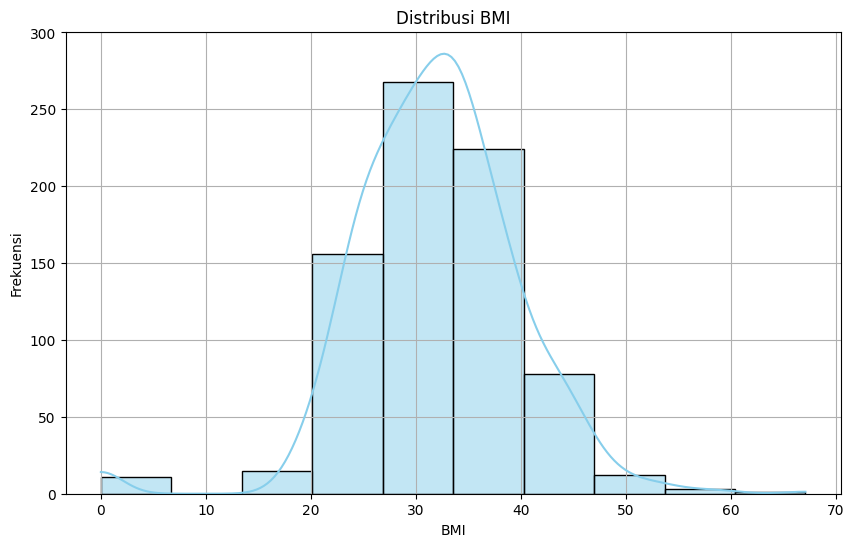

In [5]:
# visualisasi distribusi BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

# Histogram ini membantu kita memahami bagaimana nilai BMI tersebar dalam dataset.

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_13060\3844321303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='BloodPressure', palette='Set2')


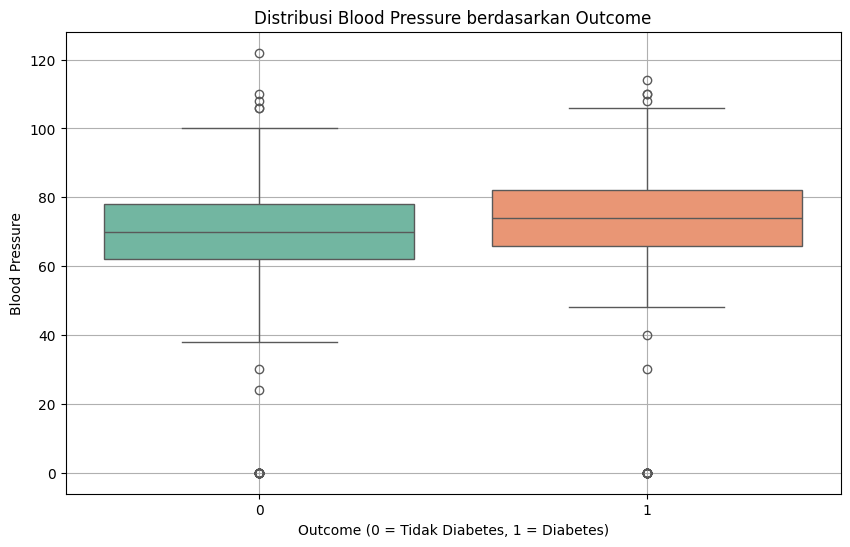

In [7]:
# Visualisasi boxplot untuk Blood Pressure berdasarkan Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='BloodPressure', palette='Set2')
plt.title('Distribusi Blood Pressure berdasarkan Outcome')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Blood Pressure')
plt.grid()
plt.show()

# Boxplot ini memberikan informasi tentang median, kuartil, dan kemungkinan outlier dalam data.

In [15]:
# Preparasi untuk analisa mengunakan machine learning
from sklearn.preprocessing import StandardScaler

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)


Model accuracy  score with criterion entropy: 0.7662
Training set score: 0.7752
Test set score: 0.7662


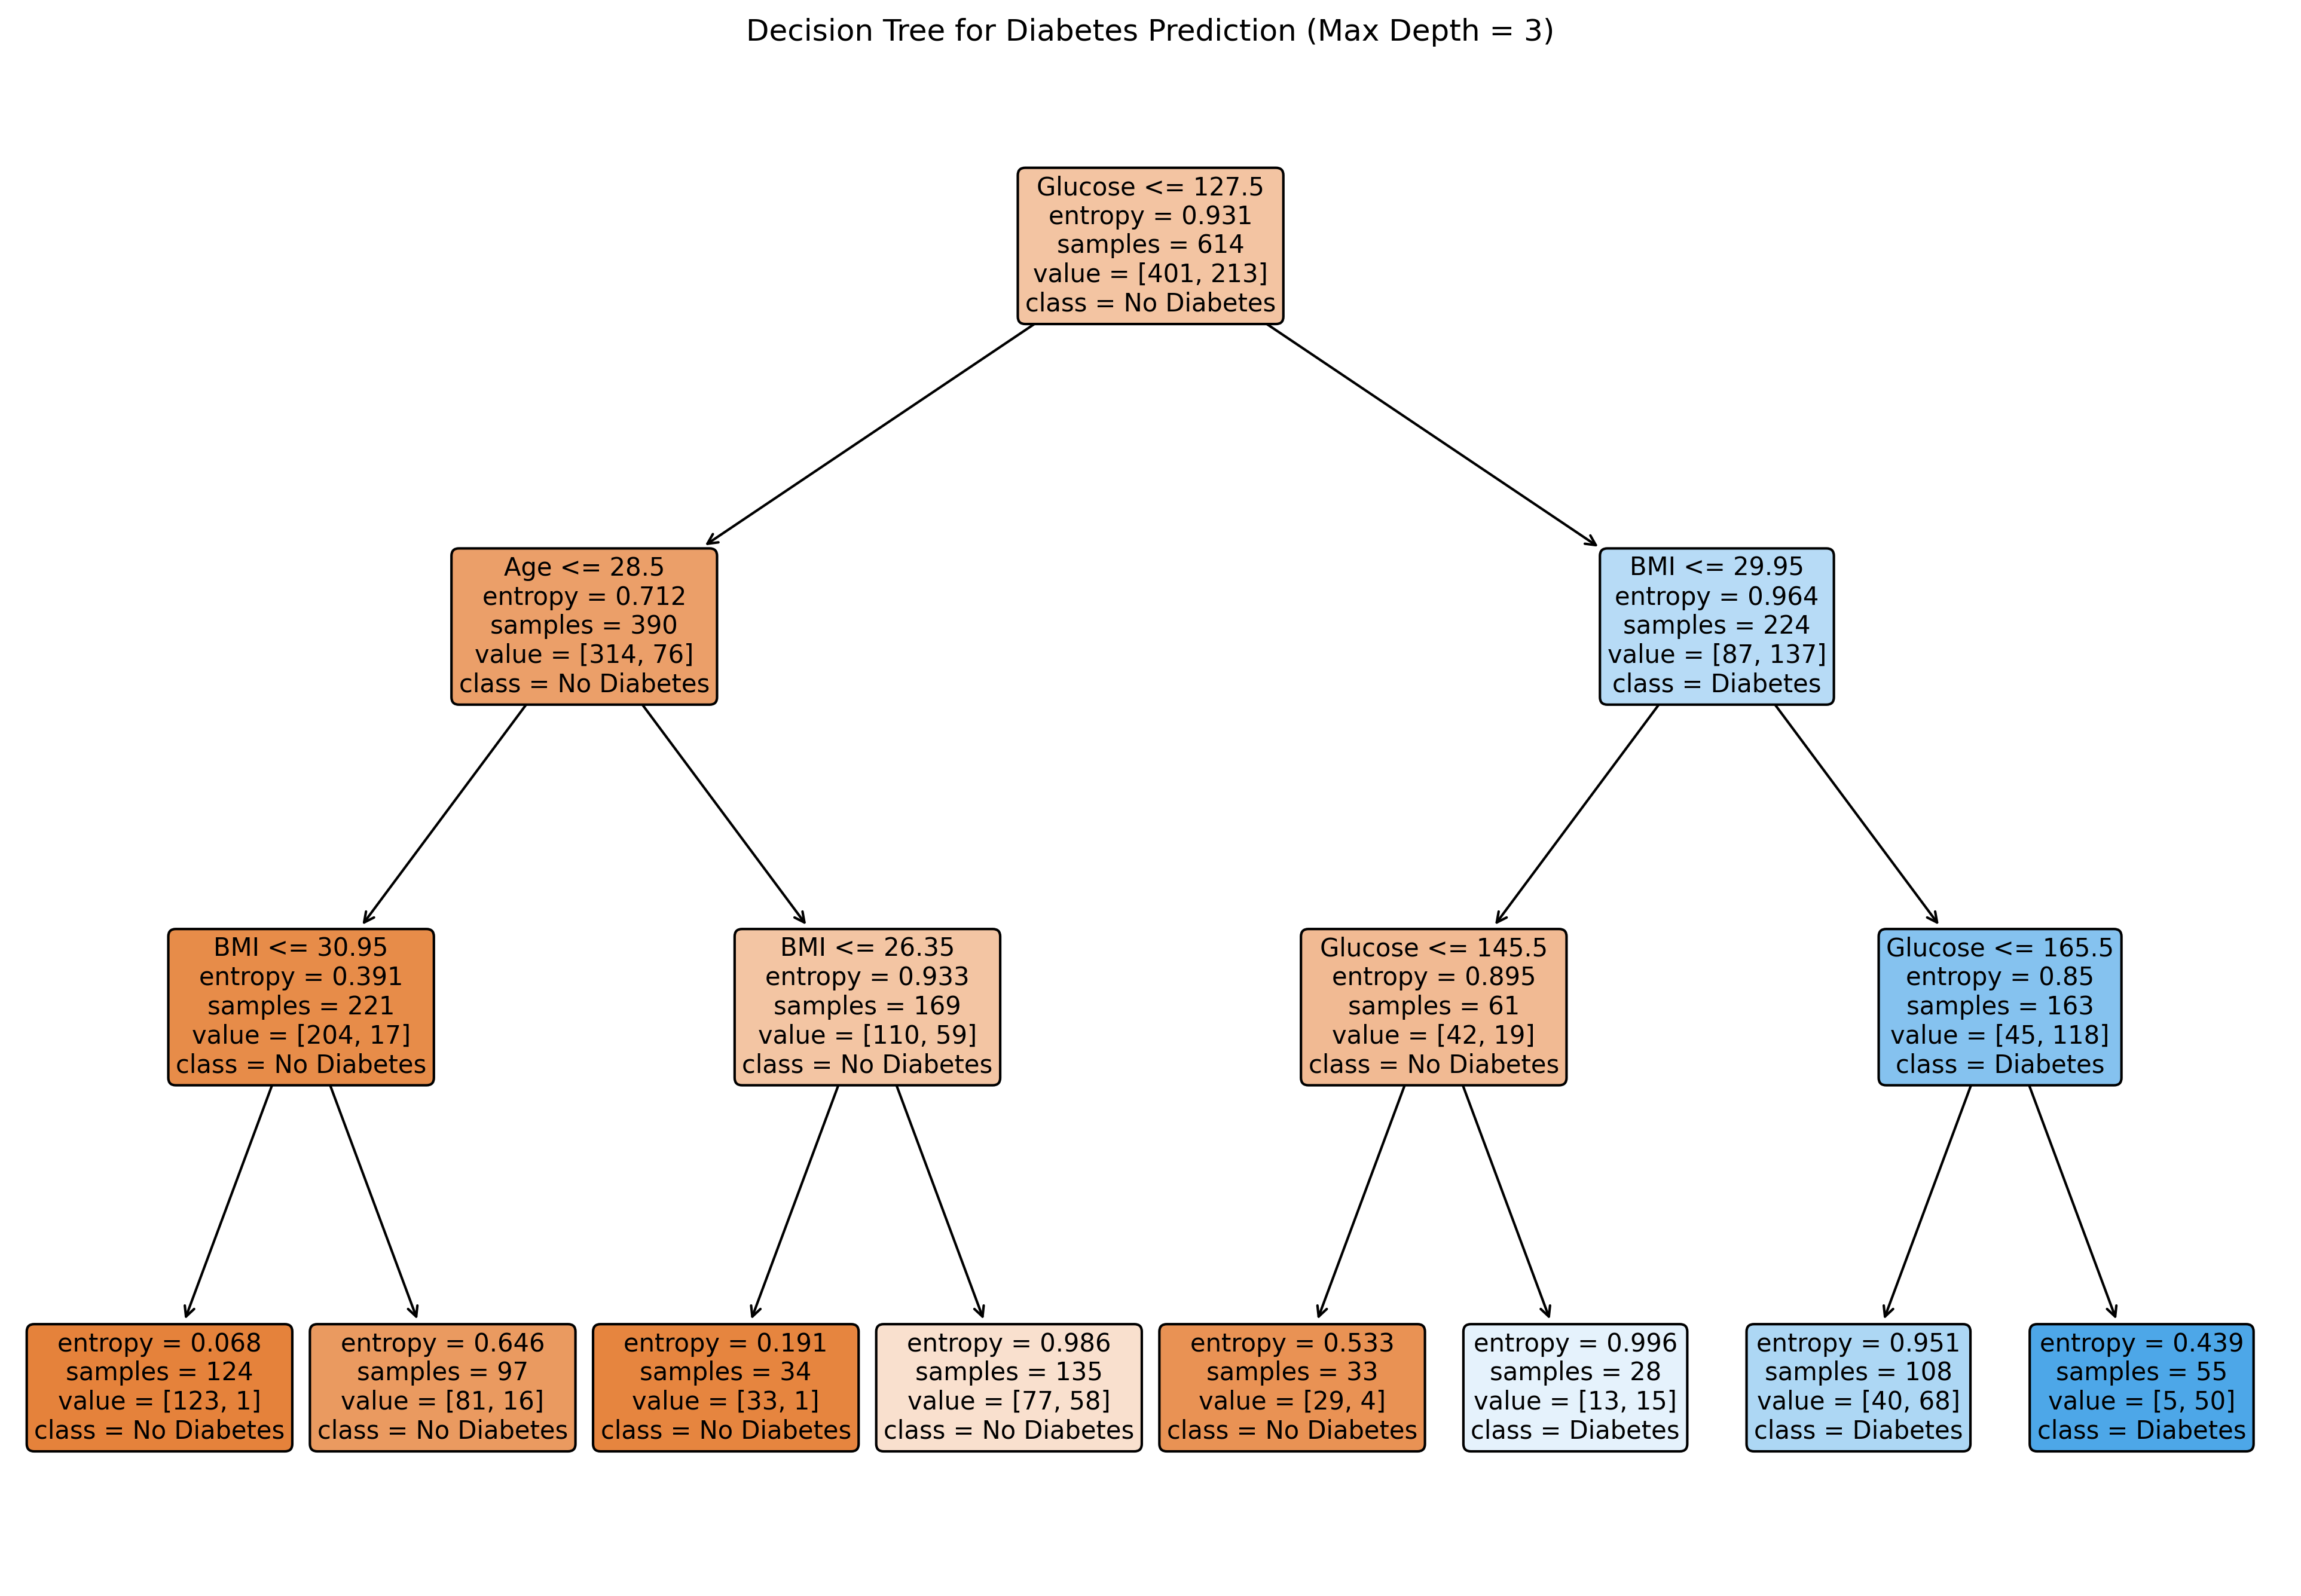

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [19]:
# Criterion Entropy Decision Tree

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)

y_pred_en = clf_en.predict(x_test)

print("Model accuracy  score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test,y_pred_en)))

print("Training set score: {0:0.4f}".format(clf_en.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(x_test,y_test)))

plt.figure(figsize=(13, 9), dpi=300)

clf_en.fit(x_train, y_train)

tree.plot_tree(clf_en, 
               feature_names=x_train.columns,  
               class_names=['No Diabetes', 'Diabetes'],  
               filled=True,  
               rounded=True,  
               fontsize=10,   
               max_depth=3)   

plt.title("Decision Tree for Diabetes Prediction (Max Depth = 3)")
plt.tight_layout()  
plt.show()
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_log_reg = log_reg.predict(x_test)

print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))

Confusion Matrix (Logistic Regression):
[[78 21]
 [18 37]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# K Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)  
knn_classifier.fit(x_train, y_train)

y_pred_knn = knn_classifier.predict(x_test)

print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))


Confusion Matrix (KNN):
[[65 34]
 [20 35]]

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



In [21]:
# Konklusi
print("dari ketiga metode klasifikasi yang telah dilakukan, Entropy memiliki weighted avg tertinggi dengan selisih 0.1 dan 0.9")

dari ketiga metode klasifikasi yang telah dilakukan, Entropy memiliki weighted avg tertinggi dengan selisih 0.1 dan 0.9
